# Spacy

En este notebook vamos a extraer texto desde una página web (web scraping) usando requests y BeautifulSoup, y luego procesarlo con spaCy, una de las librerías de NLP

Aplicaremos técnicas básicas como:

- Extracción de texto desde HTML

- Tokenización con spaCy

- Identificación de oraciones, palabras y entidades

Este flujo es ideal para tareas de análisis textual, minería de datos o simplemente explorar el lenguaje de forma automatizada.

In [2]:
# Scrapear una web y utilizar Spacy

!pip install spacy watermark -q
!python -m spacy download es_core_news_lg -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 3.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [20]:
import requests
from bs4 import BeautifulSoup
import spacy
from spacy import displacy
import random
import es_core_news_lg
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import nltk
from nltk.corpus import stopwords
import re
import pandas as pd

In [4]:
url = "https://es.wikipedia.org/wiki/Lionel_Messi"
contenido = requests.get(url).text
soup = BeautifulSoup(contenido, "html.parser")

In [5]:
h1 = soup.find_all("p")
parrafo_aleatorio = random.choice(h1)
print(parrafo_aleatorio.text)

A pesar de que Rijkaard lo había llevado como suplente para el partido de ida de la Supercopa de España contra el Betis el 13 de agosto,[56]​ Messi no pudo jugar por estar ya cubierto el cupo de extranjeros. El Barcelona ganó 3-0 y, una semana después, perdió 2-1, resultado con el que obtuvo el primer título de la temporada.[57]​ Messi, entretanto, obtuvo la nacionalidad española el 1 de octubre, por lo que tampoco pudo participar en las cinco primeras jornadas de La Liga.[58]​ El 24 de agosto, fue titular en el Trofeo Joan Gamper ante la Juventus en el Camp Nou. Pese a que el Barcelona perdió 2-4 en la tanda de penaltis tras un empate 2-2, su desempeño fue tan bueno que, por primera vez, lo ovacionaron cuando fue sustituido y Fabio Capello, DT de la Juventus, le pidió a Rijkaard si no se lo cedía, además de decir en la conferencia de prensa posterior que "Nunca había visto a un jugador con tanta calidad a esta edad y con esa personalidad con una camiseta tan importante".[59]​[60]​[61]

In [6]:
# Modelo para procesar palabras en español
nlp = spacy.load("es_core_news_lg")
nlp = es_core_news_lg.load()

In [7]:
# Le aplicamos el modelo a nuestro parrafo aleatorio
doc = nlp(parrafo_aleatorio.text)

In [8]:
# Aplicamos lematizacion, es para ver la forma base de una palabra
print("Lematizacion")
for token in doc:
    if not token.is_punct and not token.is_space:
      print(f"'{token.text}' -> '{token.lemma_}'")

Lematizacion
'A' -> 'a'
'pesar' -> 'pesar'
'de' -> 'de'
'que' -> 'que'
'Rijkaard' -> 'Rijkaard'
'lo' -> 'él'
'había' -> 'haber'
'llevado' -> 'llevar'
'como' -> 'como'
'suplente' -> 'suplente'
'para' -> 'para'
'el' -> 'el'
'partido' -> 'partido'
'de' -> 'de'
'ida' -> 'ida'
'de' -> 'de'
'la' -> 'el'
'Supercopa' -> 'Supercopa'
'de' -> 'de'
'España' -> 'España'
'contra' -> 'contra'
'el' -> 'el'
'Betis' -> 'Betis'
'el' -> 'el'
'13' -> '13'
'de' -> 'de'
'agosto,[56]​' -> 'agosto,[56]​'
'Messi' -> 'Messi'
'no' -> 'no'
'pudo' -> 'poder'
'jugar' -> 'jugar'
'por' -> 'por'
'estar' -> 'estar'
'ya' -> 'ya'
'cubierto' -> 'cubierto'
'el' -> 'el'
'cupo' -> 'cupo'
'de' -> 'de'
'extranjeros' -> 'extranjero'
'El' -> 'el'
'Barcelona' -> 'Barcelona'
'ganó' -> 'ganar'
'3-0' -> '3-0'
'y' -> 'y'
'una' -> 'uno'
'semana' -> 'semana'
'después' -> 'después'
'perdió' -> 'perder'
'2-1' -> '2-1'
'resultado' -> 'resultado'
'con' -> 'con'
'el' -> 'el'
'que' -> 'que'
'obtuvo' -> 'obtener'
'el' -> 'el'
'primer' -> 'prim

In [9]:
# Vemos los cada uno de los tokens
tokens = [token.text for token in doc]
print(tokens)

['A', 'pesar', 'de', 'que', 'Rijkaard', 'lo', 'había', 'llevado', 'como', 'suplente', 'para', 'el', 'partido', 'de', 'ida', 'de', 'la', 'Supercopa', 'de', 'España', 'contra', 'el', 'Betis', 'el', '13', 'de', 'agosto,[56]\u200b', 'Messi', 'no', 'pudo', 'jugar', 'por', 'estar', 'ya', 'cubierto', 'el', 'cupo', 'de', 'extranjeros', '.', 'El', 'Barcelona', 'ganó', '3-0', 'y', ',', 'una', 'semana', 'después', ',', 'perdió', '2-1', ',', 'resultado', 'con', 'el', 'que', 'obtuvo', 'el', 'primer', 'título', 'de', 'la', 'temporada.[57]\u200b', 'Messi', ',', 'entretanto', ',', 'obtuvo', 'la', 'nacionalidad', 'española', 'el', '1', 'de', 'octubre', ',', 'por', 'lo', 'que', 'tampoco', 'pudo', 'participar', 'en', 'las', 'cinco', 'primeras', 'jornadas', 'de', 'La', 'Liga.[58]\u200b', 'El', '24', 'de', 'agosto', ',', 'fue', 'titular', 'en', 'el', 'Trofeo', 'Joan', 'Gamper', 'ante', 'la', 'Juventus', 'en', 'el', 'Camp', 'Nou', '.', 'Pese', 'a', 'que', 'el', 'Barcelona', 'perdió', '2-4', 'en', 'la', 'tan

In [10]:
# Etiquetado gramatical
for token in doc:
    print("Token:", token.text, ", Categoria gramatical:", token.pos_, ", Significado:",spacy.explain(token.pos_), ", Etiqueta:",token.tag_, ", Rol sintactico:",token.dep_)

Token: A , Categoria gramatical: ADP , Significado: adposition , Etiqueta: ADP , Rol sintactico: mark
Token: pesar , Categoria gramatical: NOUN , Significado: noun , Etiqueta: NOUN , Rol sintactico: fixed
Token: de , Categoria gramatical: ADP , Significado: adposition , Etiqueta: ADP , Rol sintactico: fixed
Token: que , Categoria gramatical: SCONJ , Significado: subordinating conjunction , Etiqueta: SCONJ , Rol sintactico: fixed
Token: Rijkaard , Categoria gramatical: PROPN , Significado: proper noun , Etiqueta: PROPN , Rol sintactico: nsubj
Token: lo , Categoria gramatical: PRON , Significado: pronoun , Etiqueta: PRON , Rol sintactico: obj
Token: había , Categoria gramatical: AUX , Significado: auxiliary , Etiqueta: AUX , Rol sintactico: aux
Token: llevado , Categoria gramatical: VERB , Significado: verb , Etiqueta: VERB , Rol sintactico: advcl
Token: como , Categoria gramatical: SCONJ , Significado: subordinating conjunction , Etiqueta: SCONJ , Rol sintactico: mark
Token: suplente , 

In [11]:
print("\n📈 Representación gráfica de dependencias:\n")
displacy.render(doc, style='dep', jupyter=True, options={'distance': 100})


📈 Representación gráfica de dependencias:



In [12]:
# Vemos las entidades propias
for ent in doc.ents:
  print(f'{ent.text} - {ent.label_} - {spacy.explain(ent.label_)}')

Rijkaard - PER - Named person or family.
Supercopa de España - MISC - Miscellaneous entities, e.g. events, nationalities, products or works of art
Betis - ORG - Companies, agencies, institutions, etc.
Messi - PER - Named person or family.
El Barcelona - ORG - Companies, agencies, institutions, etc.
Messi - PER - Named person or family.
La Liga.[58]​ - MISC - Miscellaneous entities, e.g. events, nationalities, products or works of art
Trofeo Joan Gamper - MISC - Miscellaneous entities, e.g. events, nationalities, products or works of art
Juventus - ORG - Companies, agencies, institutions, etc.
Camp Nou - LOC - Non-GPE locations, mountain ranges, bodies of water
Barcelona - ORG - Companies, agencies, institutions, etc.
Fabio Capello - PER - Named person or family.
DT - ORG - Companies, agencies, institutions, etc.
Juventus - ORG - Companies, agencies, institutions, etc.
Rijkaard - PER - Named person or family.
Mundo Deportivo - MISC - Miscellaneous entities, e.g. events, nationalities, p

In [13]:
# Mostrar entidades con spacy
displacy.render(doc, style ='ent', jupyter = True)

In [14]:
# Descarga corpus español stopwords
nltk.download('stopwords')
stopwords_es = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
# Funcion para limpiar texto

def limpiar_texto(texto):
  texto_minuscula = texto.lower()
  texto_limpio = re.sub(r'[^\w\s]', '', texto_minuscula)
  palabras = texto_limpio.split()
  palabras_importantes = []

  for palabra in palabras:
    if palabra not in stopwords_es:
      palabras_importantes.append(palabra)

  return palabras_importantes

texto_completo = soup.get_text()
palabras_limpias = limpiar_texto(texto_completo)

texto_limpio = ' '.join(palabras_limpias)

In [16]:
# Funcion para limpiar texto

def limpiar_texto(texto):

  palabras_a_eliminar = ['veces', 'base', 'de', 'central', 'marzo', 'marca', 'uso',
        'ocultar', 'antes', 'porque', 'cuando', 'cómo', 'donde', 'lateral',
        'abril', 'ejemplo', 'agosto','julio','junio', 'marzo','mayo','octubre','diciembre','enero','febrero','septiembre','consultado']

  black_list = stopwords_es.union(palabras_a_eliminar)

  texto_minuscula = texto.lower()

  texto_sin_puntuacion = re.sub(r'[^\w\s]', '', texto_minuscula)

  lista_palabras = texto_sin_puntuacion.split()

  palabras_importantes = []

  for palabra in lista_palabras:
    if palabra not in black_list:
      palabras_importantes.append(palabra)

  return palabras_importantes

In [17]:
# Limpiamos nuestro parrafo con las funciones creadas

texto_completo = soup.get_text()

palabras_limpias = limpiar_texto(texto_completo)

texto_limpio = ' '.join(palabras_limpias)

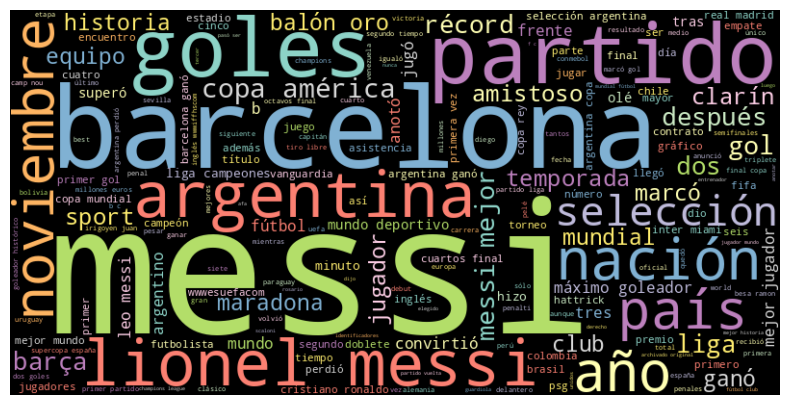

In [18]:
# Usamos Wordcloud para crear un grafico de palabras segun su repeticion

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='Set3',
).generate(texto_limpio)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
# Creamos un DF con los tokens

tokens_data = []
for token in doc:
    if not token.is_space:
        tokens_data.append({
            "Token": token.text,
            "Lema": token.lemma_,
            "Categoría Gramatical": spacy.explain(token.pos_),
            "Etiqueta": token.tag_,
            "Dependencia": spacy.explain(token.dep_),
            "Cabeza": token.head.text
        })

df_token = pd.DataFrame(tokens_data)

pd.options.display.max_rows = None
df_token.head(20)

/usr/local/lib/python3.11/dist-packages/spacy/glossary.py:20: UserWarning: [W118] Term 'expl:pass' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))


,Token,Lema,Categoría Gramatical,Etiqueta,Dependencia,Cabeza
0,A,a,adposition,ADP,marker,llevado
1,pesar,pesar,noun,NOUN,fixed multiword expression,A
2,de,de,adposition,ADP,fixed multiword expression,A
3,que,que,subordinating conjunction,SCONJ,fixed multiword expression,A
4,Rijkaard,Rijkaard,proper noun,PROPN,nominal subject,llevado
5,lo,él,pronoun,PRON,object,llevado
6,había,haber,auxiliary,AUX,auxiliary,llevado
7,llevado,llevar,verb,VERB,adverbial clause modifier,jugar
8,como,como,subordinating conjunction,SCONJ,marker,suplente
9,suplente,suplente,noun,NOUN,oblique nominal,llevado
